In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install seaborn as sns

  Using cached https://files.pythonhosted.org/packages/b4/08/226c133ec497d25a63edb38527c02db093c7d89e6d4cdc91078834486a5d/as-0.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/58/80/d5a2a12fae635474014e7e0c88959daab3bf815648250fbb7639dd02fe50/sns-0.1.tar.gz
  Running setup.py bdist_wheel for sns ... done
  Stored in directory: /Users/LeoDecter/Library/Caches/pip/wheels/be/a5/d8/4390400ed430c8186a6af96dbb1cc7d0a00a5dee15d268b627
Successfully built sns
You are using pip version 18.0, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
player_stats = pd.read_csv("player_stats_data.csv", index_col=0)
player_stats.rename(columns={'PLAYER':'Player'}, inplace=True)
player_stats.head()

,Player,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
0,Quentin Bonnaud,12,83,6.92,15,1.25,14,1.17,101,8.42,208,17.33,96.3,284,23.67
1,Rowan McDonnell,13,67,5.15,51,3.92,5,0.38,92,7.08,408,31.38,93.8,359,27.62
2,Ben Jagt,15,67,4.47,64,4.27,14,0.93,111,7.40,287,19.13,91.4,379,25.27
3,Max Sheppard,14,61,4.36,68,4.86,9,0.64,103,7.36,295,21.07,91.0,337,24.07
4,Eli Jaime,10,52,5.20,12,1.20,4,0.40,61,6.10,101,10.10,95.3,211,21.10


In [6]:
team_stats = pd.read_csv("team_stats.csv", index_col=0)
team_stats.head()

,Team,G,W,L,T,PTS,PPG,PA,PAPG,OEFF,DEFF,+ / -,+/- PG,BLK,BPG,CMP,CPG,CMP %,TO,TPG
0,New York Empire,15,15,0,0,334,22.27,282,18.80,0.48,-0.42,588,39.20,150,10.00,"3,547",236.47,94.7,230,15.33
1,San Diego Growlers,14,11,3,0,328,23.43,292,20.86,0.46,-0.42,581,41.50,157,11.21,"3,404",243.14,94.8,228,16.29
2,Raleigh Flyers,13,10,3,0,293,22.54,255,19.62,0.39,-0.36,514,39.54,124,9.54,"3,197",245.92,95.0,192,14.77
3,Dallas Roughnecks,15,10,5,0,320,21.33,300,20.00,0.32,-0.41,550,36.67,202,13.47,"3,640",242.67,93.7,290,19.33
4,Pittsburgh Thunderbirds,14,9,5,0,298,21.29,270,19.29,0.33,-0.41,487,34.79,141,10.07,"3,551",253.64,94.5,249,17.79


In [7]:
rosters = pd.read_csv("rosters.csv", index_col=0)
rosters.head()

,Player,Team
0,Sam Batson,hustle
1,Sun Choi,hustle
2,Karl Ekwurtzel,hustle
3,Brett Hulsmeyer,hustle
4,Elijah Jaime,hustle


In [8]:
data = rosters.merge(player_stats, left_on='Player', right_on='Player')
data.head()

,Player,Team,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
0,Sam Batson,hustle,8,0,0.00,4,0.50,3,0.38,4,0.50,24,3.00,88.9,67,8.38
1,Sun Choi,hustle,10,2,0.20,10,1.00,3,0.30,6,0.60,90,9.00,90.9,132,13.20
2,Karl Ekwurtzel,hustle,9,4,0.44,1,0.11,4,0.44,2,0.22,44,4.89,86.3,121,13.44
3,Brett Hulsmeyer,hustle,10,8,0.80,1,0.10,12,1.20,18,1.80,38,3.80,92.7,179,17.90
4,Matthew Knowles,hustle,7,0,0.00,13,1.86,0,0.00,7,1.00,117,16.71,95.1,108,15.43


In [25]:
from sklearn.linear_model import LinearRegression

0.08838979718625152


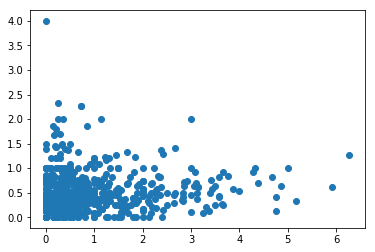

In [26]:
print(np.corrcoef(data['APG'], data['BPG'])[0][1])
plt.scatter(data['APG'], data['BPG'])
plt.show()

0.2642215002601914


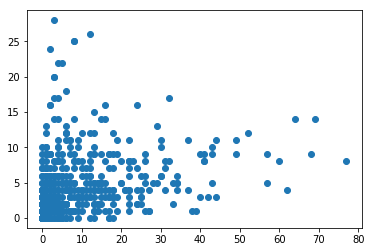

In [27]:
print(np.corrcoef(data['AST'], data['BLK'])[0][1])
plt.scatter(data['AST'], data['BLK'])
plt.show()

In [34]:
ast_blk_model = LinearRegression()
ast_blk_model.fit(data[['AST']], data['BLK'])
print('assists and blocks',ast_blk_model.coef_[0], ast_blk_model.intercept_)

assists and blocks 0.09659101733770603 3.5648955709435026


In [35]:
apg_bpg_model = LinearRegression()
apg_bpg_model.fit(data[['APG']], data['BPG'])
print('assists per game and blocks per game',apg_bpg_model.coef_[0], apg_bpg_model.intercept_)

assists per game and blocks per game 0.036209164911059875 0.4634594276894995


0.1754601227787437


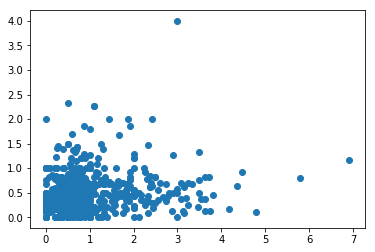

In [30]:
print(np.corrcoef(data['GPG'], data['BPG'])[0][1])
plt.scatter(data['GPG'], data['BPG'])
plt.show()

0.3223817657206969


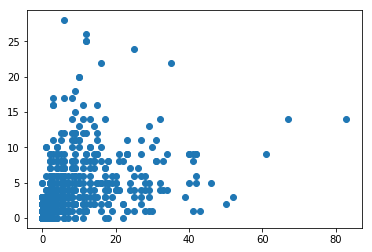

In [31]:
print(np.corrcoef(data['GLS'], data['BLK'])[0][1])
plt.scatter(data['GLS'], data['BLK'])
plt.show()

In [32]:
gpg_bpg_model = LinearRegression()
gpg_bpg_model.fit(data[['GPG']], data['BPG'])
print('goals per game and blocks per game',gpg_bpg_model.coef_[0], gpg_bpg_model.intercept_)

0.08033502254022673 0.4208955126969992


In [37]:
gls_blk_model = LinearRegression()
gls_blk_model.fit(data[['GLS']], data['BLK'])
print('goals and blocks',gls_blk_model.coef_[0], gls_blk_model.intercept_)

goals and blocks 0.13313665559033958 3.2372740893173244


In [50]:
filtered_data = data.loc[data['PP'] < 200]

goals and blocks with more than 50 points played 0.22677086872390628


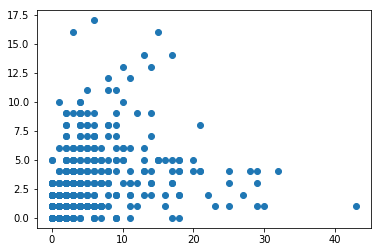

assists and blocks with more than 50 points played 0.09995335433917836


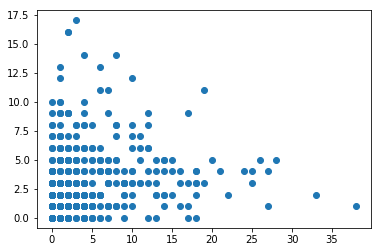

In [51]:
print('goals and blocks with more than 50 points played',np.corrcoef(filtered_data['GLS'], filtered_data['BLK'])[0][1])
plt.scatter(filtered_data['GLS'], filtered_data['BLK'])
plt.show()
print('assists and blocks with more than 50 points played',np.corrcoef(filtered_data['AST'], filtered_data['BLK'])[0][1])
plt.scatter(filtered_data['AST'], filtered_data['BLK'])
plt.show()